# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from pathlib import Path
#from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
#load_dotenv()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 2.0

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_content = btc_data

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_content = eth_data

# Compute current value of my crpto
my_btc_value = btc_content['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_content['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20226.13
The current value of your 2.0 ETH is $2430.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
AAPL_path = Path("../Data Collection Notebooks/asset_historical_prices/AAPL.csv")
AAPL = pd.read_csv(AAPL_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AAPL.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [9]:
AMZN_path = Path("../Data Collection Notebooks/asset_historical_prices/AMZN.csv")
AMZN = pd.read_csv(AMZN_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AMZN.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [10]:
TSLA_path = Path("../Data Collection Notebooks/asset_historical_prices/TSLA.csv")
TSLA = pd.read_csv(TSLA_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
TSLA.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [11]:
NVDA_path = Path("../Data Collection Notebooks/asset_historical_prices/NVDA.csv")
NVDA = pd.read_csv(NVDA_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
NVDA.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [12]:
META_path = Path("../Data Collection Notebooks/asset_historical_prices/META.csv")
META = pd.read_csv(META_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
META.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [13]:
GOOGL_path = Path("../Data Collection Notebooks/asset_historical_prices/GOOGL.csv")
GOOGL = pd.read_csv(GOOGL_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
GOOGL.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [14]:
MSFT_path = Path("../Data Collection Notebooks/asset_historical_prices/MSFT.csv")
MSFT = pd.read_csv(MSFT_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
MSFT.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [15]:
JPM_path = Path("../Data Collection Notebooks/asset_historical_prices/JPM.csv")
JPM = pd.read_csv(JPM_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
JPM.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [16]:
KO_path = Path("../Data Collection Notebooks/asset_historical_prices/KO.csv")
KO = pd.read_csv(KO_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
KO.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [17]:
PG_path = Path("../Data Collection Notebooks/asset_historical_prices/PG.csv")
PG = pd.read_csv(PG_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
PG.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [18]:
PEP_path = Path("../Data Collection Notebooks/asset_historical_prices/PEP.csv")
PEP = pd.read_csv(PEP_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
PEP.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [19]:
BTC_path = Path("../Data Collection Notebooks/asset_historical_prices/BTC-USD.csv")
BTC = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
BTC.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [20]:
ETH_path = Path("../Data Collection Notebooks/asset_historical_prices/ETH-USD.csv")
ETH = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
ETH.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [21]:
AGG_path = Path("../Data Collection Notebooks/bonds/AGG.csv")
AGG = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AGG.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [57]:
def agg_function(stock_allocation,bond_allocation):
    df_stock_data = pd.concat([AAPL,AMZN,TSLA,NVDA,META,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','TSLA','NVDA','META','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
    return df_stock_data
    #sim_returns = MCSimulation(
    #portfolio_data = df_stock_data,
    #weights = [(stock_allocation/500), (stock_allocation/500),(stock_allocation/500),(stock_allocation/500),(stock_allocation/500),.025,.025,(bond_allocation/100)],
    #num_simulation=500,
    #num_trading_days=252*15
    #)
    ##sim_returns.portfolio_data.head() # Checking the simulation input data
    #return sim_returns.calc_cumulative_return()
     
def mod_function(stock_allocation,bond_allocation):
    df_stock_data = pd.concat([AAPL,AMZN,JPM,GOOGL,MSFT,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','GOOGL','MSFT','JPM','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
    sim_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [(stock_allocation/500), (stock_allocation/500),(stock_allocation/500),(stock_allocation/500),(stock_allocation/500),.025,.025,(bond_allocation/100)],
    num_simulation=500,
    num_trading_days=252*15
    )
    #sim_returns.portfolio_data.head() # Checking the simulation input data
    return sim_returns.calc_cumulative_return()

def conserv_function(stock_allocation,bond_allocation):
    df_stock_data = pd.concat([AAPL,AMZN,KO,PG,PEP,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','KO','PG','PEP','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
    sim_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [(stock_allocation/500), (stock_allocation/500),(stock_allocation/500),(stock_allocation/500),(stock_allocation/500),.025,.025,(bond_allocation/100)],
    num_simulation=500,
    num_trading_days=252*15
    )
    #sim_returns.portfolio_data.head() # Checking the simulation input data
    return sim_returns.calc_cumulative_return()

In [58]:
#agg_stocks = [AAPL,AMZN,TSLA,NVDA,META,BTC,ETH,AGG]
#agg_series = pd.Series(agg_stocks)
#agg_keys = [AAPL,AMZN,TSLA,NVDA,META,ETH,AGG]
#agg_keys_series = pd.Series(agg_keys)
#mod_stocks = []
#conserv_stocks = []

age = int(input("What is your age?"))
stock_selection = int(input("Please select whether you would like portfolio consisting of aggressive, moderate or conservative performing stocks.  Select '1' for aggressive, '2' for moderate, and '3' for conservative:"))
stock_allocation = 110 - age
bond_allocation = 100 - stock_allocation - 5

if stock_selection == 1:
    df_stock_data = pd.concat([AAPL,AMZN,JPM,GOOGL,MSFT,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','GOOGL','MSFT','JPM','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
    #agg_function(stock_allocation,bond_allocation)
    #plots = sim_returns.plot_simulation() # To depict an image with simulation outcomes
    #sim_returns.portfolio_data.head() # Checking the simulation input data
elif stock_selection == 2:
    mod_function(stock_allocation,bond_allocation)
elif stock_selection == 3:
    conserv_function(stock_allocation,bond_allocation)


What is your age? 30
Please select whether you would like portfolio consisting of aggressive, moderate or conservative performing stocks.  Select '1' for aggressive, '2' for moderate, and '3' for conservative: 1


In [54]:
sim_returns.calc_cumulative_return()


NameError: name 'sim_returns' is not defined

In [55]:
plots = sim_returns.plot_simulation() # To depict an image with simulation outcomes

#df_stock_data = pd.concat([portfolio], axis=1, keys=[stock_keys])
#
#df_stock_data = df_stock_data.dropna()
#df_stock_data

NameError: name 'sim_returns' is not defined

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
#df_stock_data = pd.concat([AAPL,AMZN,TSLA,NVDA,META,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','TSLA','NVDA','META','BTC','ETH','AGG'])
#df_stock_data = df_stock_data.dropna()

In [ ]:
#def agg_function:
#    df_stock_data = pd.concat([AAPL,AMZN,TSLA,NVDA,META,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','TSLA','NVDA','META','BTC','ETH','AGG'])
#    df_stock_data = df_stock_data.dropna()
#    sim_returns = MCSimulation(
#    portfolio_data = df_stock_data,
#    weights = [(stock_allocation/500), (stock_allocation/500),(stock_allocation/500),(stock_allocation/500),(stock_allocation/500),.025,.025,(bond_allocation/100)],
#    num_simulation=500,
#    num_trading_days=252*15
#    )
#    sim_returns.portfolio_data.head() # Checking the simulation input data

In [59]:
# Configuring a Monte Carlo simulation to forecast Y years of cumulative returns
# df_ticker is df_stock_data here
sim_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [(stock_allocation/500), (stock_allocation/500),(stock_allocation/500),(stock_allocation/500),(stock_allocation/500),.025,.025,(bond_allocation/100)],
    num_simulation=500,
    num_trading_days=252*15
)

sim_returns.portfolio_data.head() # Checking the simulation input data

AAPL                                              \
                 open       high        low      close  adj close   
Date                                                                
2014-09-17  25.317499  25.450001  25.147499  25.395000  22.760485   
2014-09-18  25.482500  25.587500  25.389999  25.447500  22.807531   
2014-09-19  25.572500  25.587500  25.125000  25.240000  22.621561   
2014-09-22  25.450001  25.535000  25.145000  25.264999  22.643967   
2014-09-23  25.150000  25.735001  25.135000  25.660000  22.997986   

                                           AMZN                        ...  \
                 volume daily_return       open       high        low  ...   
Date                                                                   ...   
2014-09-17  243706000.0          NaN  16.388000  16.400000  16.076000  ...   
2014-09-18  149197600.0     0.002067  16.271999  16.355000  16.185499  ...   
2014-09-19  283609600.0    -0.008154  16.379999  16.638000  16.278500  ...   
2014-09-22  211153600.0     0.000990  16.424500  16.474501  16.052999  ...   
2014-09-23  253608800.0     0.015634  16.122999  16.379999  16.062500  ...   

                   ETH                                  AGG              \
             adj close      volume daily_return        open        high   
Date                                                                      
2014-09-17  457.334015  21056800.0          NaN  465.864014  468.174011   
2014-09-18  424.440002  34483200.0    -0.071926  456.859985  456.859985   
2014-09-19  394.795990  37919700.0    -0.069843  424.102997  427.834991   
2014-09-22  402.152008  24127600.0     0.018632  399.100006  406.915985   
2014-09-23  435.790985  45099500.0     0.083647  402.092010  441.557007   

                                                                         
                   low       close   adj close      volume daily_return  
Date                                                                     
2014-09-17  452.421997  457.334015  457.334015  21056800.0          NaN  
2014-09-18  413.104004  424.440002  424.440002  34483200.0    -0.071926  
2014-09-19  384.532013  394.795990  394.795990  37919700.0    -0.069843  
2014-09-22  397.130005  402.152008  402.152008  24127600.0     0.018632  
2014-09-23  396.196991  435.790985  435.790985  45099500.0     0.083647  

[5 rows x 56 columns]

In [60]:
sim_returns.calc_cumulative_return() # Forecast 30 years of cumulative returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 110.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 120.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 130.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 140.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 150.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 160.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 170.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 180.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 190.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 200.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 210.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 220.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 230.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 240.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 250.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 260.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 270.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 280.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 290.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 300.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 310.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 320.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 330.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 340.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 350.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 360.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 370.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 380.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 390.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 400.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 410.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 420.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 430.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 440.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 450.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 460.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 470.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 480.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 490.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.019251,1.007733,1.004020,0.993584,0.995970,1.006570,1.000654,1.002031,1.002577,1.012136,...,0.979759,1.001369,1.005696,1.007555,0.994472,0.997935,1.005586,1.000506,0.996861,0.984153
2,1.031452,1.002625,1.005919,0.995886,0.988129,1.007898,1.001772,1.012625,1.018195,1.004832,...,0.997476,1.009854,1.000337,0.988624,1.009069,1.000400,0.991565,1.001610,1.001915,0.977853
3,1.039844,1.004915,1.003274,1.009382,0.972566,1.010823,1.003861,1.006102,1.017188,1.005029,...,0.994148,1.012374,0.996729,0.997160,1.024386,1.010000,1.002857,0.999034,0.986797,0.967187
4,1.037811,1.009053,1.019085,1.014376,0.958074,1.007667,1.009608,1.008953,1.016287,1.015973,...,0.989705,1.002995,1.005080,0.990256,1.032626,0.996129,1.000153,0.993504,0.984781,0.962760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,91.612934,129.771055,44.491406,169.635043,87.384367,186.105599,134.449855,159.594639,65.732634,101.833419,...,50.260888,96.577137,20.220633,19.657989,39.253055,194.227935,56.461736,73.488917,104.843025,166.690858
3777,92.020829,129.458018,43.715764,170.346066,87.479340,185.616903,132.630498,159.648815,64.883011,101.302217,...,51.231005,96.473475,20.254198,19.532423,39.475107,192.563366,56.525946,73.935680,106.184439,162.398851
3778,92.720279,129.568981,44.292677,172.731886,88.242294,186.858023,131.479846,161.320099,64.419082,102.322125,...,51.836047,96.322362,20.520699,19.661810,39.040130,194.915245,57.203319,74.569242,106.748943,161.247651
3779,92.083939,129.057826,44.382735,171.222928,88.938337,189.941464,130.320027,157.553847,64.181624,102.295152,...,51.677724,96.948979,20.631261,19.871859,39.323718,193.568809,57.530804,74.241833,108.983486,158.611851


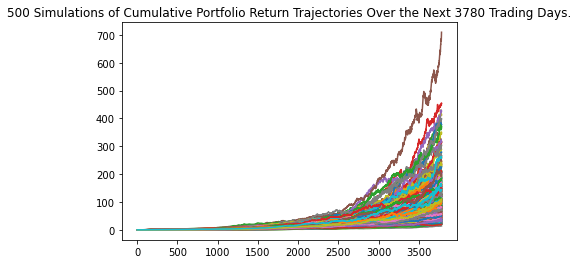

In [61]:
plots = sim_returns.plot_simulation() # To depict an image with simulation outcomes

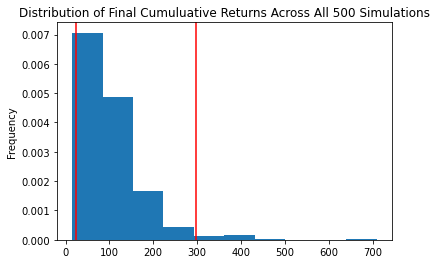

In [62]:
dist_plot = sim_returns.plot_distribution() # Plot probability distribution and confidence intervals

### Retirement Analysis

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
all_stats = sim_returns.summarize_cumulative_return()

print(all_stats)

count           500.000000
mean            103.094089
std              72.718843
min              15.161576
25%              57.394268
50%              86.272926
75%             126.113910
max             709.066559
95% CI Lower     24.555324
95% CI Upper    297.297847
Name: 3780, dtype: float64


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [64]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(initial_investment * all_stats[9],2) 
port_low_return = round(initial_investment * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 15 years will end within in the range of $491106.48 and $5945956.94


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(initial_investment * all_stats[8],2)
ci_upper = round(initial_investment * all_stats[9],2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $19146578.85 and $4930997297.68


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
riskier_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation=100,
    num_trading_days=252*5
)
riskier_returns.portfolio_data.head() # For a forecast amounting to 5 years of cumulative returns

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2019-05-23 00:00:00-04:00  109.18  109.5000  109.14  109.38  4501018.0   
2019-05-24 00:00:00-04:00  109.37  109.4499  109.33  109.42  1778069.0   
2019-05-28 00:00:00-04:00  109.57  109.6500  109.50  109.58  4744701.0   
2019-05-29 00:00:00-04:00  109.73  109.8500  109.60  109.61  5186962.0   
2019-05-30 00:00:00-04:00  109.77  109.9400  109.65  109.89  3051986.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2019-05-23 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2019-05-24 00:00:00-04:00     0.000366  283.74  284.20  282.090  282.80   
2019-05-28 00:00:00-04:00     0.001462  283.09  284.15  280.180  280.31   
2019-05-29 00:00:00-04:00     0.000274  278.91  279.36  276.710  278.38   
2019-05-30 00:00:00-04:00     0.002555  279.11  280.04  277.805  279.05   

                                                    
                               volume daily_return  
time                                                
2019-05-23 00:00:00-04:00         NaN          NaN  
2019-05-24 00:00:00-04:00  44877163.0          NaN  
2019-05-28 00:00:00-04:00  57121638.0    -0.008805  
2019-05-29 00:00:00-04:00  88121995.0    -0.006885  
2019-05-30 00:00:00-04:00  52483275.0     0.002407

In [53]:
riskier_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998546,1.016882,1.008144,0.992386,0.993829,0.991026,0.991138,0.998802,1.007178,1.004837,...,0.998865,1.013164,0.984318,0.985289,1.016341,1.002308,0.989643,0.997942,1.020879,0.983078
2,0.994698,1.039872,1.018678,1.002178,0.994737,0.978000,0.996897,0.987715,1.003711,1.002049,...,1.029662,1.023133,0.980466,0.978899,1.016212,0.976550,1.003306,1.010070,1.031977,1.001044
3,1.003619,1.008616,1.034291,0.990787,0.984110,0.979618,0.989552,0.975011,1.000976,0.995719,...,1.016255,1.028004,0.989587,0.978106,0.987183,0.990705,1.017727,1.016327,1.031755,0.985947
4,0.990611,1.011916,1.055527,0.989416,0.997307,0.949522,0.969296,0.991292,1.012052,0.994021,...,1.039611,1.007403,0.968544,0.976691,0.983556,0.989462,1.018965,1.017616,1.037929,1.006114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.921555,3.538756,1.838082,0.944324,1.896392,1.475279,2.072412,1.632175,2.897420,4.287815,...,4.591936,2.782029,1.556923,2.466623,2.838431,1.874599,1.799746,1.557204,11.148649,1.241548
1257,1.883628,3.600828,1.822120,0.938986,1.881731,1.463434,2.082350,1.643211,2.871083,4.317513,...,4.563143,2.716488,1.544366,2.475866,2.835073,1.908387,1.827193,1.554799,11.049588,1.252397
1258,1.888332,3.630327,1.827527,0.942298,1.838207,1.479431,2.074021,1.642150,2.933369,4.381974,...,4.588022,2.721395,1.554925,2.439480,2.764104,1.952264,1.834521,1.577208,11.039372,1.263121
1259,1.834865,3.676867,1.834910,0.947736,1.858365,1.500325,2.062501,1.633835,2.879038,4.355662,...,4.573072,2.716331,1.564183,2.503699,2.782305,1.880713,1.863667,1.624920,10.938805,1.250653


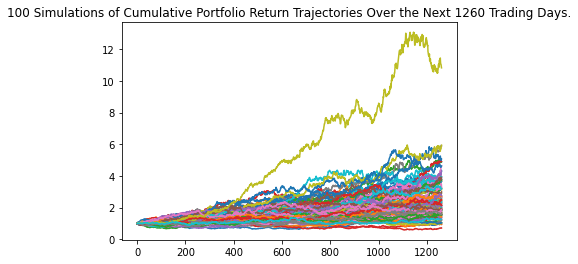

In [54]:
# Plot simulation outcomes
riskier_plots = riskier_returns.plot_simulation()

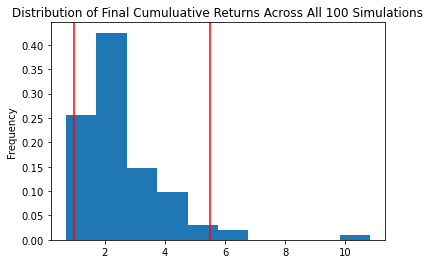

In [55]:
risky_distribution_plot = riskier_returns.plot_distribution() # Plot probability distribution and confidence intervals

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
risky_stats = riskier_returns.summarize_cumulative_return()

print(risky_stats)

count           100.000000
mean              2.557717
std               1.392215
min               0.708709
25%               1.694157
50%               2.148719
75%               3.176661
max              10.826029
95% CI Lower      0.989999
95% CI Upper      5.499416
Name: 1260, dtype: float64


In [61]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
risky_port_high_return = round(initial_investment * all_stats[9],2) 
risky_port_low_return = round(initial_investment * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${risky_port_low_return} and ${risky_port_high_return}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $562416.55 and $14202846.48


In [65]:
# 10 years of cumulative returns 
ten_Yr_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation=300,
    num_trading_days=252*10
)
ten_Yr_returns.portfolio_data.head() 

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2019-05-23 00:00:00-04:00  109.18  109.5000  109.14  109.38  4501018.0   
2019-05-24 00:00:00-04:00  109.37  109.4499  109.33  109.42  1778069.0   
2019-05-28 00:00:00-04:00  109.57  109.6500  109.50  109.58  4744701.0   
2019-05-29 00:00:00-04:00  109.73  109.8500  109.60  109.61  5186962.0   
2019-05-30 00:00:00-04:00  109.77  109.9400  109.65  109.89  3051986.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2019-05-23 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2019-05-24 00:00:00-04:00     0.000366  283.74  284.20  282.090  282.80   
2019-05-28 00:00:00-04:00     0.001462  283.09  284.15  280.180  280.31   
2019-05-29 00:00:00-04:00     0.000274  278.91  279.36  276.710  278.38   
2019-05-30 00:00:00-04:00     0.002555  279.11  280.04  277.805  279.05   

                                                    
                               volume daily_return  
time                                                
2019-05-23 00:00:00-04:00         NaN          NaN  
2019-05-24 00:00:00-04:00  44877163.0          NaN  
2019-05-28 00:00:00-04:00  57121638.0    -0.008805  
2019-05-29 00:00:00-04:00  88121995.0    -0.006885  
2019-05-30 00:00:00-04:00  52483275.0     0.002407

### Ten Years Retirement Option

In [66]:
ten_Yr_returns.calc_cumulative_return() # Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989387,0.990032,0.987114,0.993937,1.010460,0.993660,0.993393,0.988210,0.994656,0.990550,...,0.990819,0.991001,1.017120,1.007462,1.010147,1.024422,1.006811,1.001796,1.010313,0.989038
2,1.009616,1.004350,0.983148,1.000409,1.013629,1.019762,0.986742,0.998103,0.991717,0.983566,...,0.983808,1.009816,1.013551,1.005451,1.013089,1.011710,1.001177,0.996598,1.023061,0.992451
3,1.038715,1.003776,0.976101,0.988515,1.033009,1.033151,0.991901,1.000817,0.986116,0.995704,...,0.987836,1.005220,1.010077,1.013791,1.039034,0.988680,1.015217,1.001374,1.015105,0.991734
4,1.057245,1.004057,0.970088,0.992421,1.053422,1.044879,1.019898,0.995937,0.987007,0.992148,...,0.981627,0.988382,1.002233,1.025931,1.020480,0.986812,1.004100,0.997189,1.036474,0.980727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.270811,1.549473,2.075979,14.234749,9.864623,10.291000,6.349138,5.361294,8.251079,9.930345,...,3.129506,1.721521,5.220303,4.014105,2.362242,5.159611,5.190325,3.545771,7.960626,8.939414
2517,5.411797,1.548962,2.083734,14.075146,10.016453,10.649791,6.326060,5.437979,8.208432,9.689749,...,3.185782,1.737245,5.225549,4.006290,2.366509,5.252558,5.234530,3.515956,7.974007,9.050453
2518,5.544557,1.599662,2.082340,13.960498,9.901916,10.857555,6.604762,5.510712,8.211897,9.696547,...,3.158091,1.742226,5.174099,4.081125,2.412377,5.251152,5.295939,3.560843,8.017870,9.115638
2519,5.476396,1.591205,2.046059,13.660686,9.763617,10.986437,6.595790,5.595096,8.378770,9.693520,...,3.253126,1.753793,5.293874,3.975598,2.418053,5.203600,5.264513,3.662511,8.135191,9.139489


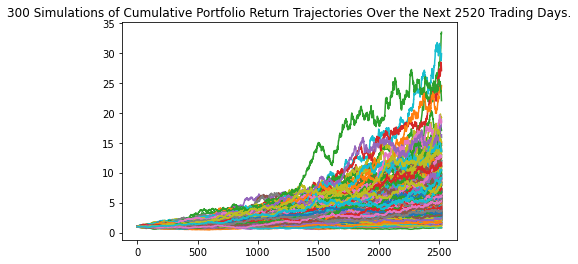

In [67]:
ten_Yr_plots = ten_Yr_returns.plot_simulation()

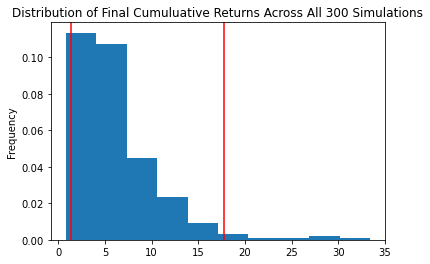

In [68]:
ten_Yr_distribution_plot = ten_Yr_returns.plot_distribution()

In [69]:
ten_Yr_stats = ten_Yr_returns.summarize_cumulative_return()

print(ten_Yr_stats)

count           300.000000
mean              6.308147
std               4.556956
min               0.806205
25%               3.349224
50%               5.327827
75%               7.967625
max              33.411928
95% CI Lower      1.341916
95% CI Upper     17.795441
Name: 2520, dtype: float64


In [70]:
initial_investment = 50000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000
ten_Yr_port_high_return = round(initial_investment * all_stats[9],2) 
ten_Yr_port_low_return = round(initial_investment * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ten_Yr_port_low_return} and ${ten_Yr_port_high_return}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $468680.46 and $11835705.4
